# 1. BERT

## 1.1 BERT  Overview

BERT是Transformer模型结构发扬光大的一个经典模型

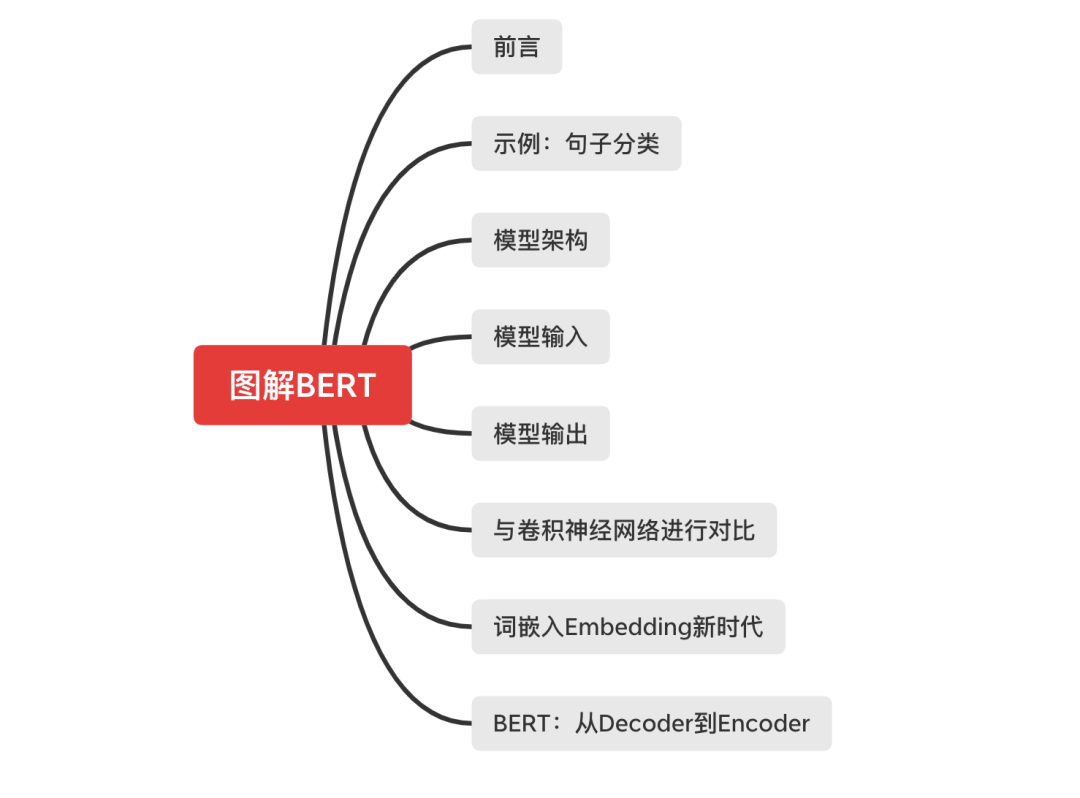

BERT在2018年出现。2018 年是机器学习模型处理文本（或者更准确地说，自然语言处理或 NLP）的转折点。我们对这些方面的理解正在迅速发展：如何最好地表示单词和句子，从而最好地捕捉基本语义和关系？此外，NLP 社区已经发布了非常强大的组件，你可以免费下载，并在自己的模型和 pipeline 中使用（今年可以说是 NLP 的 ImageNet 时刻，这句话指的是多年前类似的发展也加速了 机器学习在计算机视觉任务中的应用）。

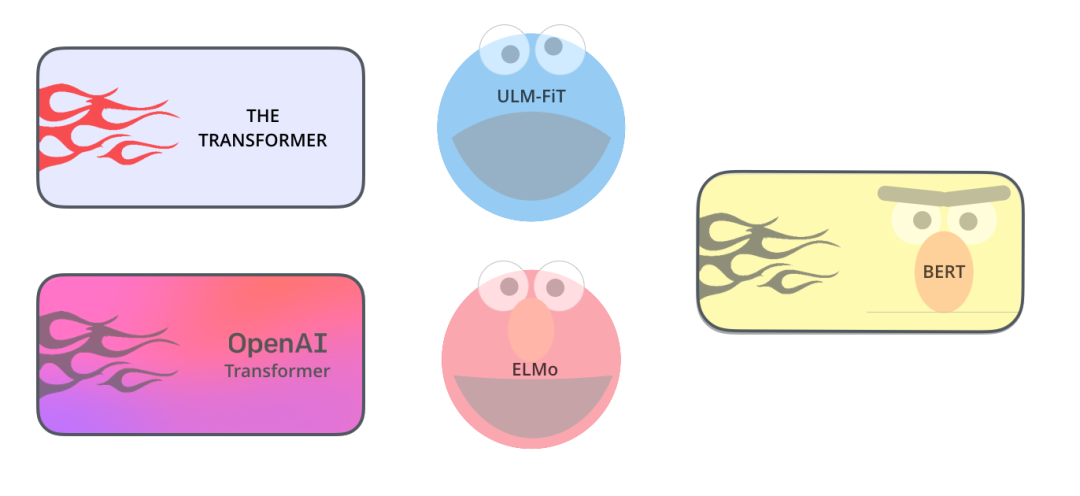

BERT的发布是这个领域发展的最新的里程碑之一，这个事件标志着NLP 新时代的开始。BERT模型打破了基于语言处理的任务的几个记录。在 BERT 的论文发布后不久，这个团队还公开了模型的代码，并提供了模型的下载版本，这些模型已经在大规模数据集上进行了预训练。这是一个重大的发展，因为它使得任何一个构建构建机器学习模型来处理语言的人，都可以将这个强大的功能作为一个现成的组件来使用，从而节省了从零开始训练语言处理模型所需要的时间、精力、知识和资源。

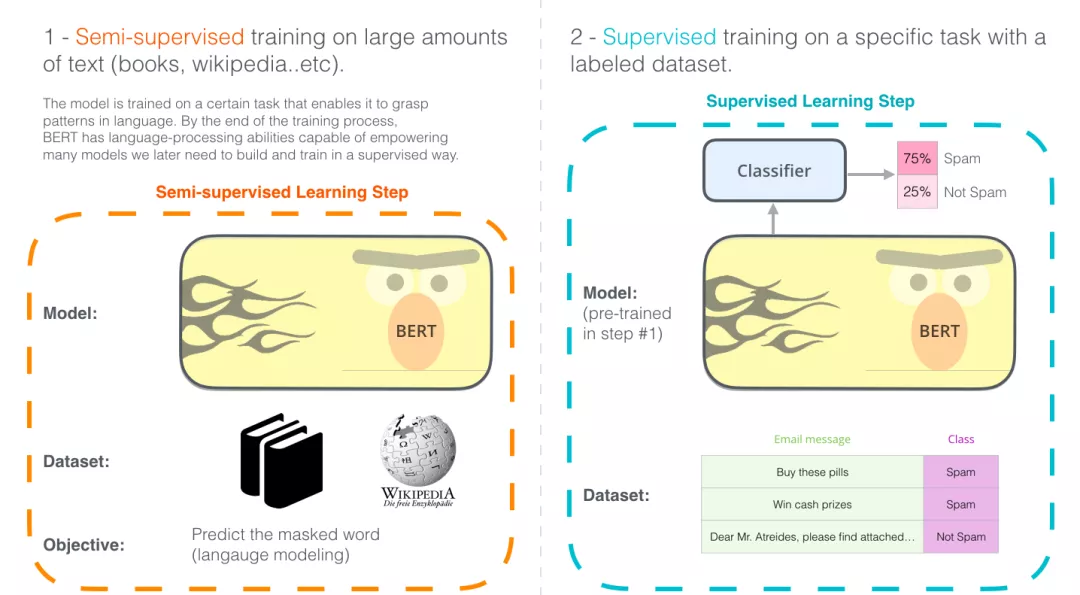

BERT 开发的两个步骤：第 1 步，你可以下载预训练好的模型（这个模型是在无标注的数据上训练的）。然后在第 2 步只需要关心模型微调即可。

## 1.2 句子分类

使用 BERT 最直接的方法就是对一个句子进行分类。这个模型如下所示：

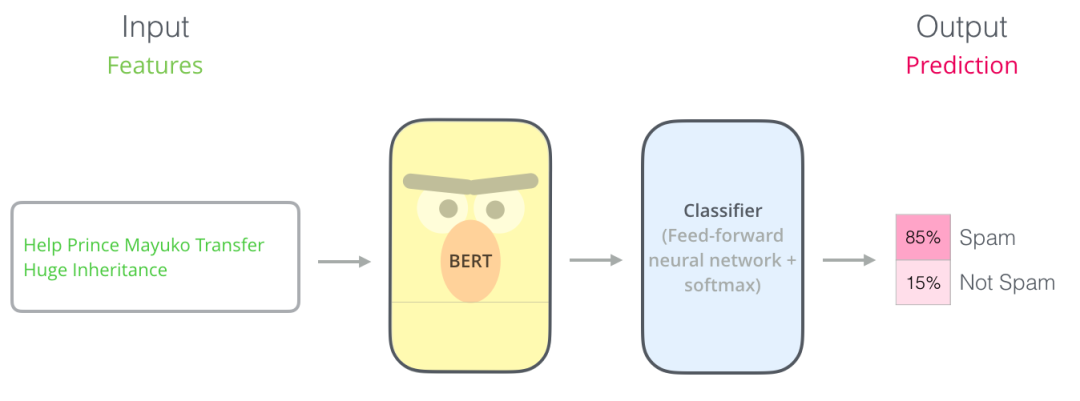

为了训练这样一个模型，你主要需要训练分类器（上图中的 Classifier），在训练过程中 几乎不用改动BERT模型。这个训练过程称为微调，它起源于Semi-supervised Sequence Learning 和 ULMFiT。

由于我们在讨论分类器，这属于机器学习的监督学习领域。这意味着我们需要一个带有标签的数据集来训练这样一个模型。例如，在下面这个垃圾邮件分类器的例子中，带有标签的数据集包括一个邮件内容列表和对应的标签（每个邮件是“垃圾邮件”或者“非垃圾邮件”）。

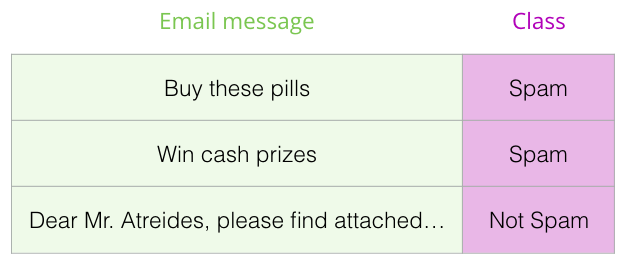

其他一些例子包括：

1） 语义分析

\$\bullet\$ 输入：电影或者产品的评价。输出：判断这个评价是正面的还是负面的。 

    数据集示例：1) SST （https://nlp.stanford.edu/sentiment） 2）Fact-checking
\$\bullet\$输入：一个句子。输出：这个句子是不是一个断言

\$\bullet\$参考视频：https://www.youtube.com/watch?v=ddf0lgPCoSo

## 1.3 模型架构

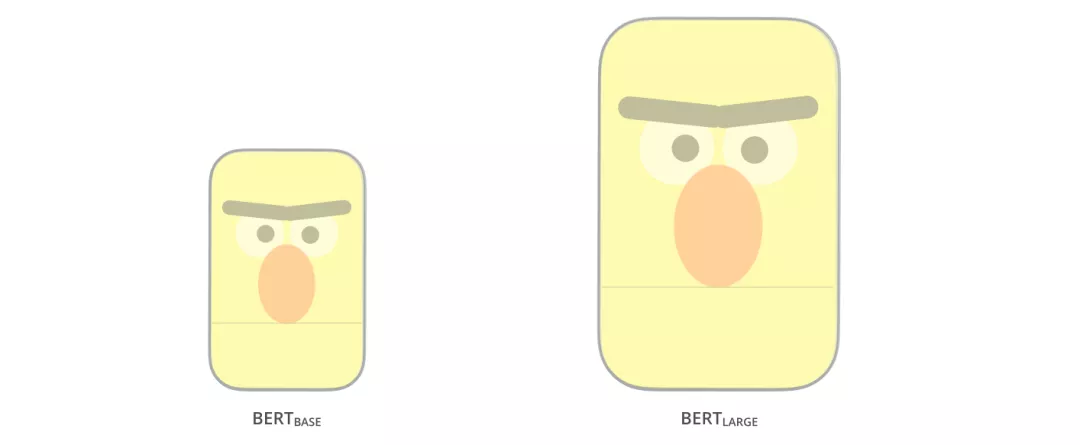

论文里介绍了两种不同模型大小的 BERT：

1. BERT BASE - 与 OpenAI 的 Transformer 大小相当，以便比较性能
2. BERT LARGE - 一个非常巨大的模型，它取得了最先进的结果

BERT 基本上是一个训练好的 Transformer 的 encoder 的栈。

2 种不同大小规模的 BERT 模型都有大量的 Encoder 层（论文里把这些层称为 Transformer Blocks）- BASE 版本由 12 层 Encoder，Large 版本有 20 层 Encoder。同时，这些 BERT 模型也有更大的前馈神经网络（分别有 768 个和 1024 个隐藏层单元）和更多的 attention heads（分别有 12 个和 16 个），超过了原始 Transformer 论文中的默认配置参数（原论文中有 6 个 Encoder 层， 512 个隐藏层单元和 8 个 attention heads）。

## 1.4 模型输入

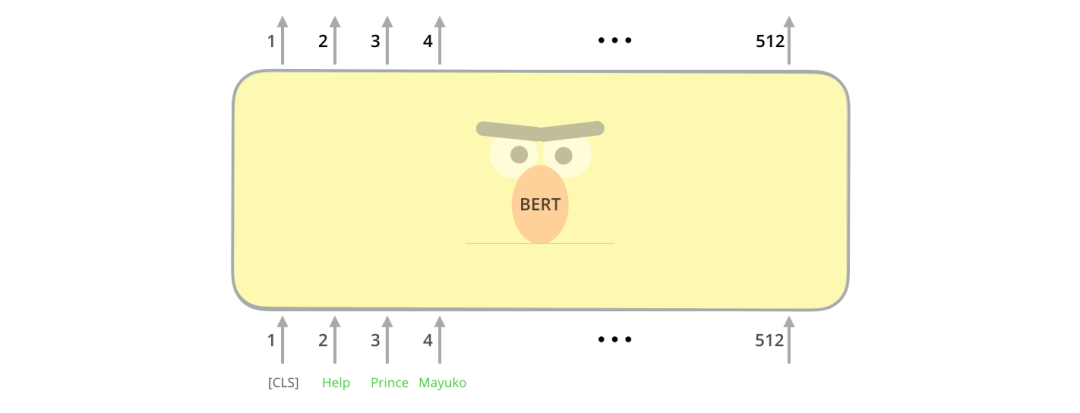

第一个输入的 token 是特殊的 [CLS]，它 的含义是分类（class的缩写）。

就像 Transformer 中普通的 Encoder 一样，BERT 将一串单词作为输入，这些单词在 Encoder 的栈中不断向上流动。每一层都会经过 Self Attention 层，并通过一个前馈神经网络，然后将结果传给下一个 Encoder。

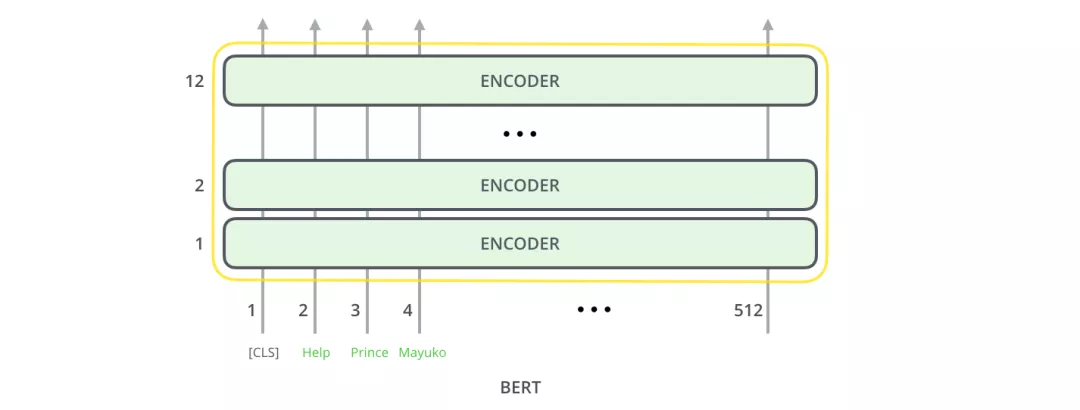

在模型架构方面，到目前为止，和 Transformer 是相同的（除了模型大小，因为这是我们可以改变的参数）。我们会在下面看到，BERT 和 Transformer 在模型的输出上有一些不同。

## 1.5 模型输出

每个位置输出一个大小为 hidden_size（在 BERT Base 中是 768）的向量。对于上面提到的句子分类的例子，我们只关注第一个位置的输出（输入是 [CLS] 的那个位置）。

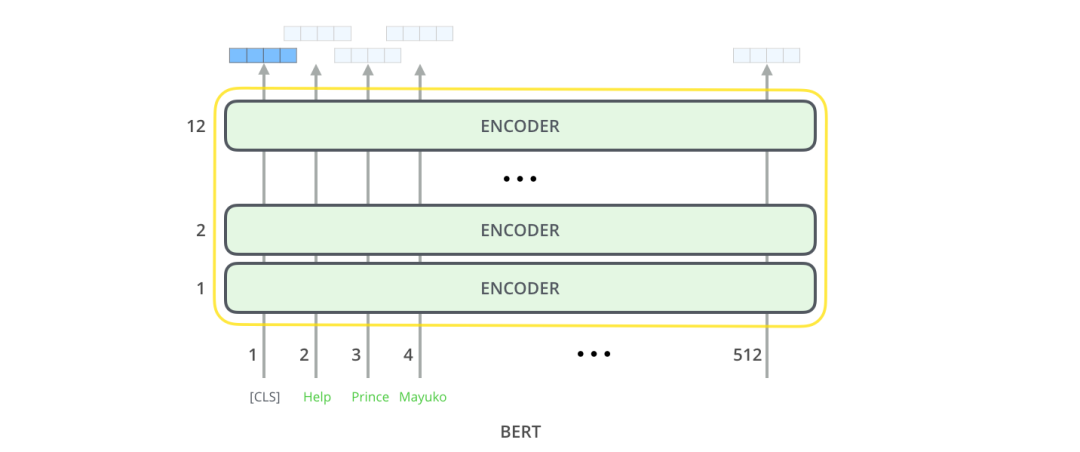

**这个输出的向量现在可以作为后面分类器的输入**。论文里用单层神经网络作为分类器，取得了很好的效果。

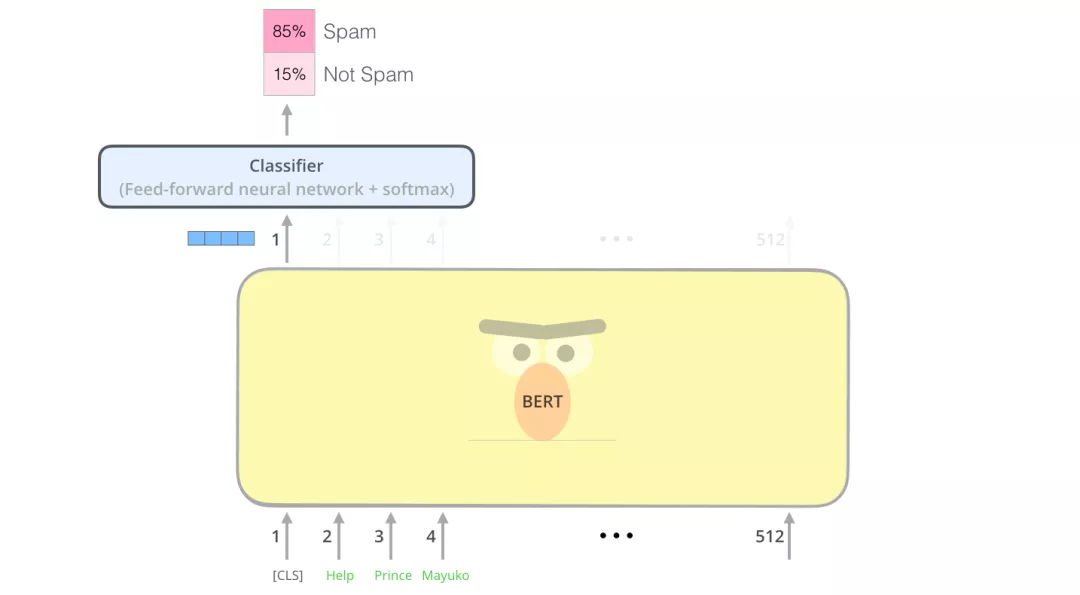

如果你有更多标签（例如你是一个电子邮件服务，需要将邮件标记为 “垃圾邮件”、“非垃圾邮件”、“社交”、“推广”），你只需要调整分类器的神经网络，增加输出的神经元个数，然后经过 softmax 即可。

### 1.5.1 与卷积神经网络的对比

这个向量传递过程，会让人联想到 VGGNet 等网络的卷积部分，和网络最后的全连接分类部分之间的过程。

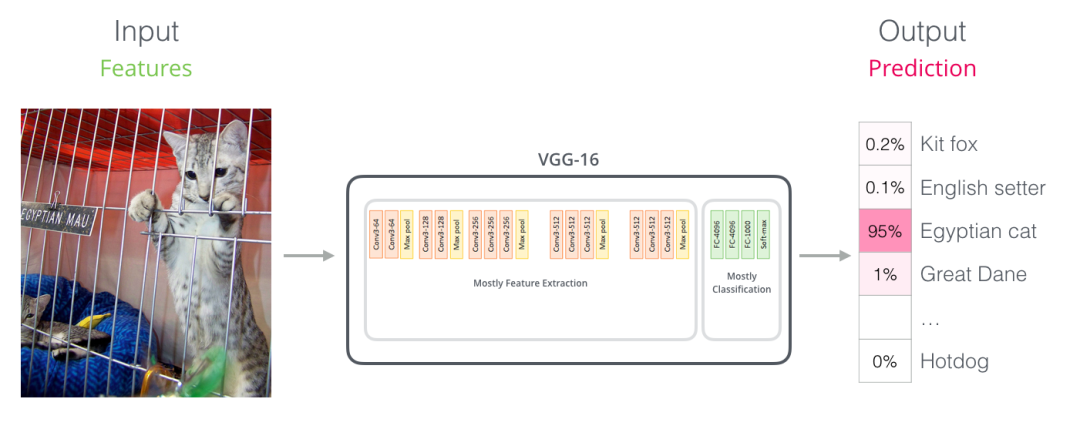

## 1.6 词嵌入（Word Embedding）的新时代

上面提到的这些新发展带来了文本编码方式的新转变。到目前为止，词嵌入一直是 NLP 模型处理语言的主要表示方法。像 Word2Vec 和 Glove 这样的方法已经被广泛应用于此类任务。在我们讨论新的方法之前，让我们回顾一下它们是如何应用的。

### 1.6.1 词嵌入的历史

单词不能直接输入机器学习模型，而需要某种数值表示形式，以便模型能够在计算中使用。通过 **Word2Vec**，我们可以使用一个向量（一组数字）来恰当地表示单词，并捕捉单词的语义以及单词和单词之间的关系（例如，判断单词是否相似或者相反，或者像 "Stockholm" 和 "Sweden" 这样的一对词，与 "Cairo" 和 "Egypt"这一对词，是否有同样的关系）以及句法、语法关系（例如，"had" 和 "has" 之间的关系与 "was" 和 "is" 之间的关系相同）。

人们很快意识到，相比于在小规模数据集上和模型一起训练词嵌入，更好的一种做法是，在大规模文本数据上预训练好词嵌入，然后拿来使用。因此，我们可以下载由 **Word2Vec** 和 **GloVe** 预训练好的单词列表，及其词嵌入。下面是单词 "stick" 的 Glove 词嵌入向量的例子（词嵌入向量长度是 200）。

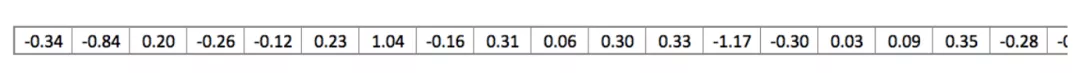

### 1.6.2 语境问题

如果我们使用 Glove 的词嵌入表示方法，那么不管上下文是什么，单词 "stick" 都只表示为同一个向量。一些研究人员指出，像 "stick" 这样的词有多种含义。为什么不能根据它使用的上下文来学习对应的词嵌入呢？这样既能捕捉单词的语义信息，又能捕捉上下文的语义信息。于是，语境化的词嵌入模型应运而生。



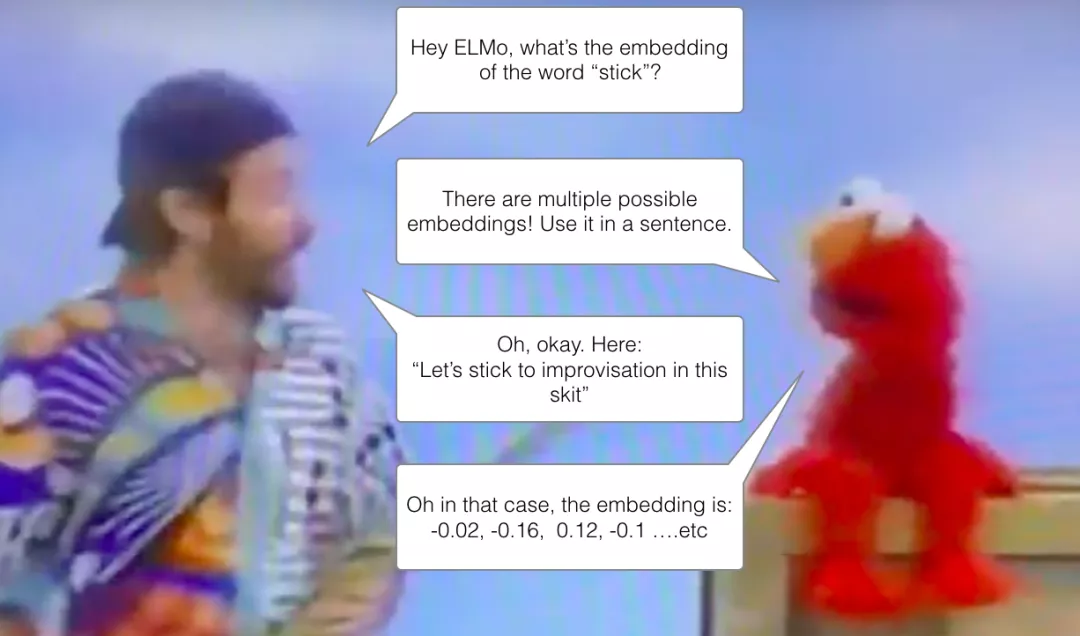

语境化的词嵌入，可以根据单词在句子语境中的含义，赋予不同的词嵌入。你可以查看这个视频 RIP Robin Williams（https://zhuanlan.zhihu.com/RIP Robin Williams）

**ELMo**没有对每个单词使用固定的词嵌入，而是在为每个词分配词嵌入之前，查看整个句子，融合上下文信息。它使用在特定任务上经过训练的双向 LSTM 来创建这些词嵌入。

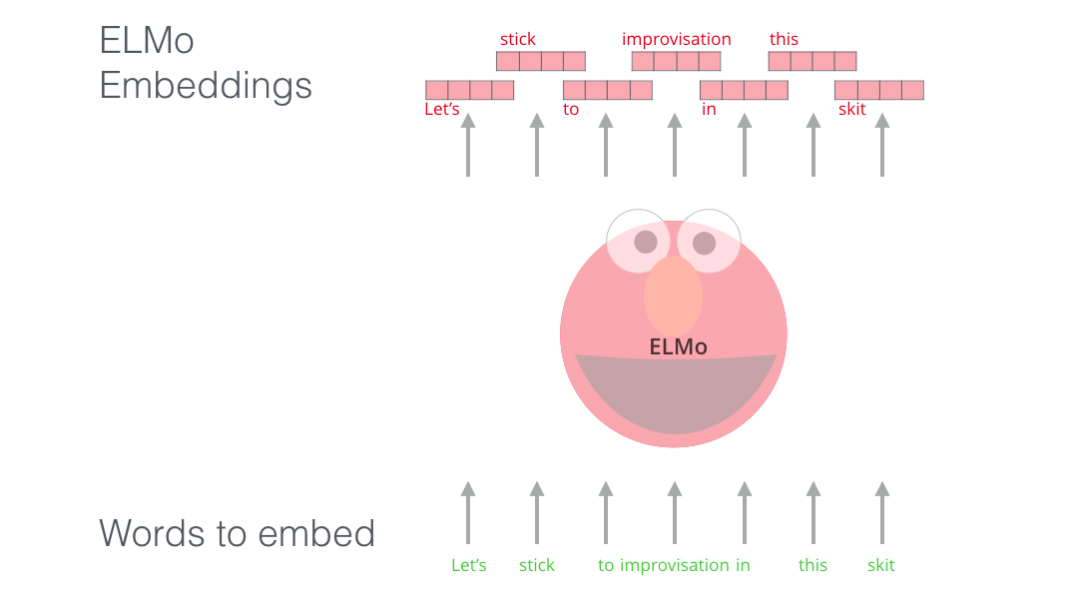

**ELMo** 在语境化的预训练这条道路上迈出了重要的一步。ELMo LSTM 会在一个大规模的数据集上进行训练，然后我们可以将它作为其他语言处理模型的一个部分，来处理自然语言任务。

那么 ELMo 的秘密是什么呢？

ELMo 通过训练，预测单词序列中的下一个词，从而获得了语言理解能力，这项任务被称为语言建模。要实现 ELMo 很方便，因为我们有大量文本数据，模型可以从这些数据中学习，而不需要额外的标签。

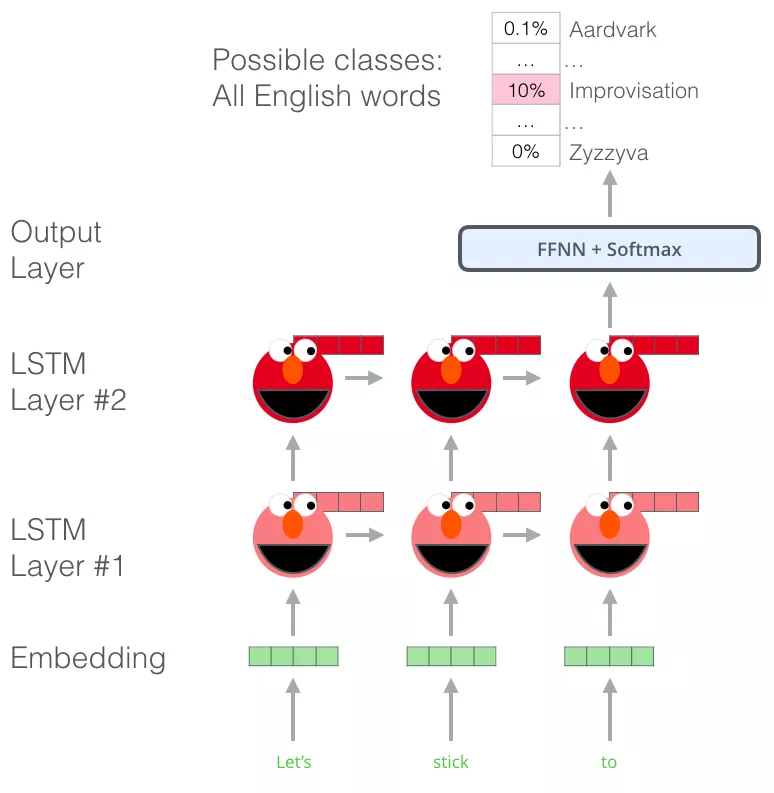

ELMo 预训练过程的其中一个步骤：以 "Let’s stick to" 作为输入，预测下一个最有可能的单词。这是一个语言建模任务。当我们在大规模数据集上训练时，模型开始学习语言的模式。例如，在 "hang" 这样的词之后，模型将会赋予 "out" 更高的概率（因为 "hang out" 是一个词组），而不是 "camera"。

在上图中，我们可以看到 ELMo 头部上方展示了 LSTM 的每一步的隐藏层状态向量。在这个预训练过程完成后，这些隐藏层状态在词嵌入过程中派上用场。

ELMo 通过将隐藏层状态（以及初始化的词嵌入）以某种方式（向量拼接之后加权求和）结合在一起，实现了带有语境化的词嵌入。

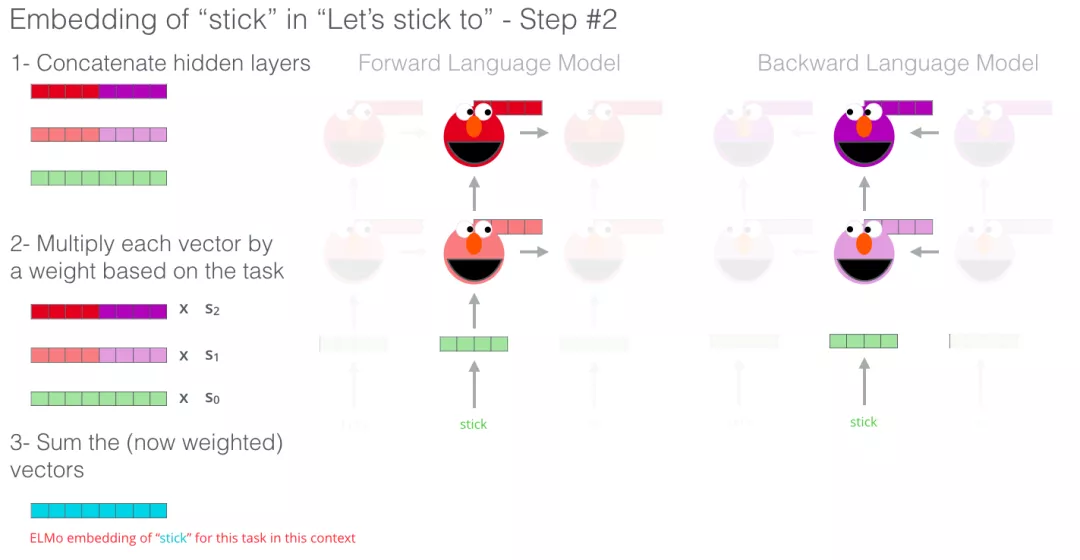

# 2. GPT

GPT-2 不是一个特别新颖的架构，而是一种与 Transformer 解码器非常类似的架构。不过 GPT-2 是一个巨大的、基于 Transformer 的语言模型，它是在一个巨大的数据集上训练的。

## 2.1 语言模型

语言模型基本上是一个机器学习模型，它可以根据句子的一部分预测下一个词。最著名的语言模型就是手机键盘，它可以根据你输入的内容，提示下一个单词。

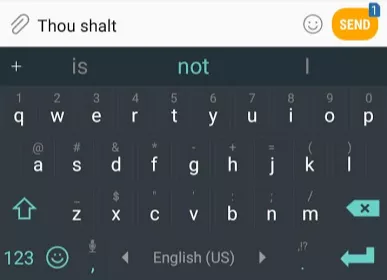

从这个意义上讲，GPT-2 基本上就是键盘应用程序中预测下一个词的功能，但 GPT-2 比你手机上的键盘 app 更大更复杂。GPT-2 是在一个 40 GB 的名为 WebText 的数据集上训练的，OpenAI 的研究人员从互联网上爬取了这个数据集，作为研究工作的一部分。从存储空间大小方面来比较，我使用的键盘应用程序 SwiftKey，占用了 78 MB 的空间。而最小的 GPT-2 变种，需要 500 MB 的空间来存储它的所有参数。最大的 GPT-2 模型变种是其大小的 13 倍，因此占用的空间可能超过 6.5 GB。

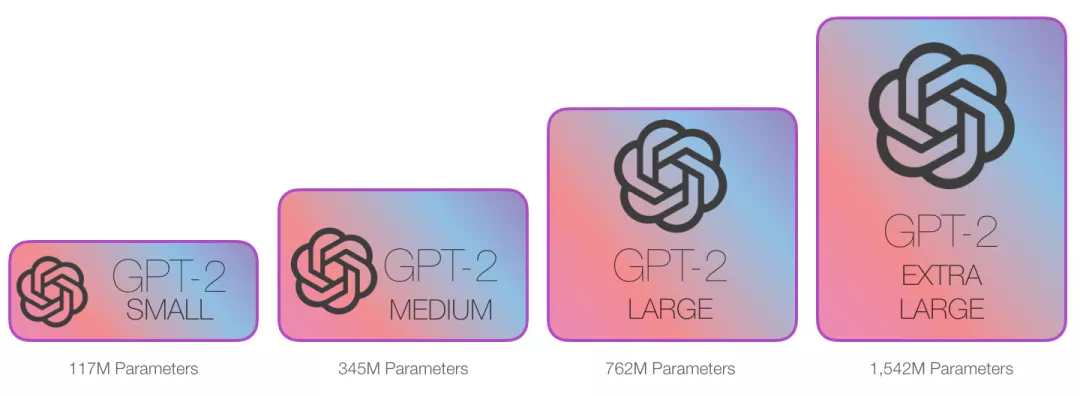

对 GPT-2 进行实验的一个很好的方法是使用**AllenAI GPT-2** Explorer(https://gpt2.apps.allenai.org/?text=Joel is)。它使用 GPT-2 来显示下一个单词的 10 种预测（包括每种预测的分数）。你可以选择一个单词，然后就能看到下一个单词的预测列表，从而生成一篇文章。

## 2.2 语言模型的 Transformer

原始的 Transformer 模型是由 Encoder 和 Decoder 组成的，它们都是由 Transformer 堆叠而成的。这种架构是合适的，因为这个模型是用于处理机器翻译的。在机器翻译问题中，Encoder-Decoder 的架构已经在过去成功应用了。

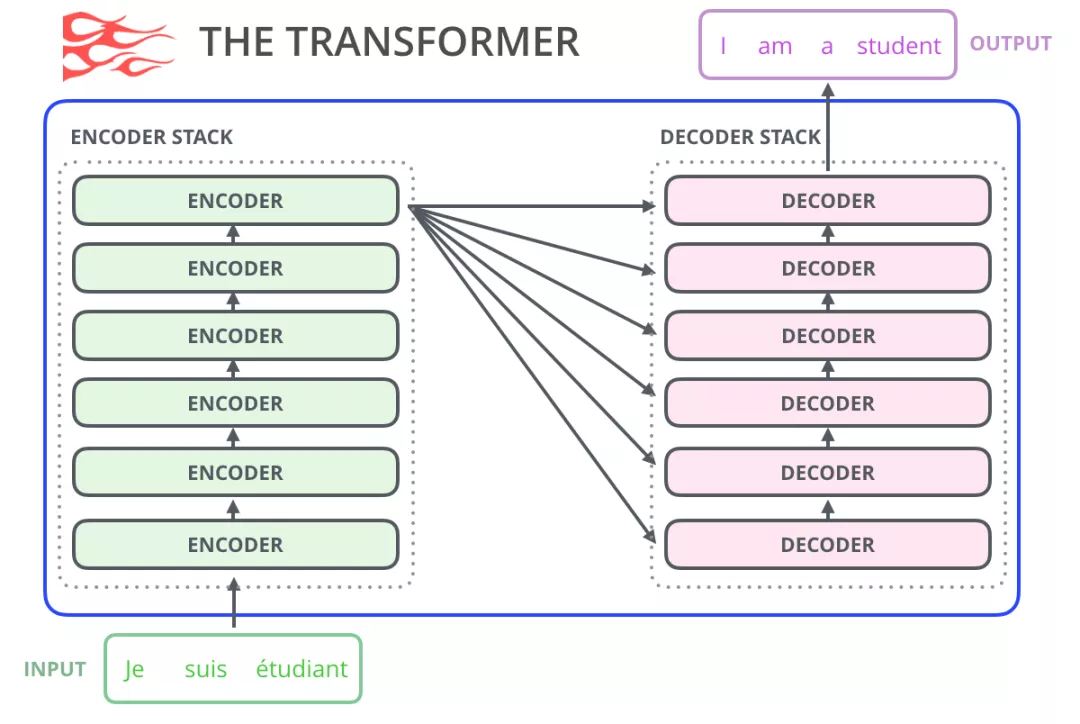

在随后的许多研究工作中，只使用 Transformer 中的一部分，要么去掉 Encoder，要么去掉 Decoder，并且将它们堆得尽可能高。使用大量的训练文本，并投入大量的计算（数十万美元用于训练这些模型，在 AlphaStar 的例子中可能是数百万美元）。

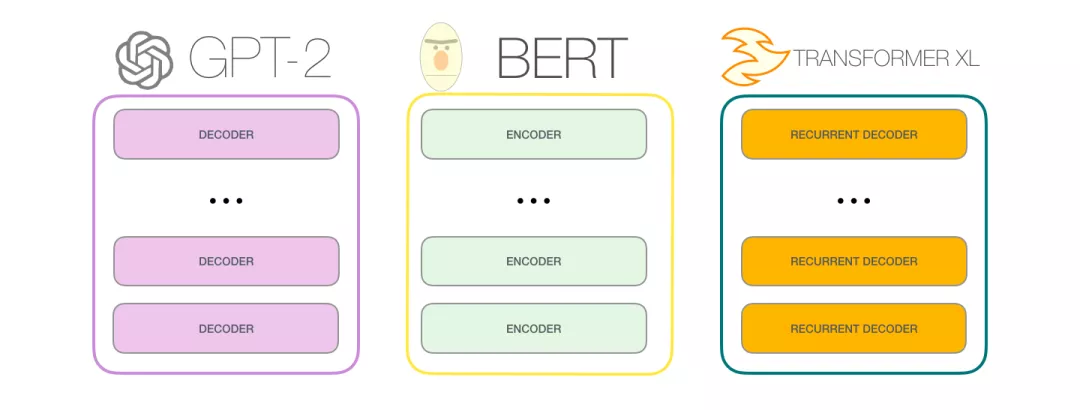

我们可以将这些模块堆得多高呢？事实证明，这是区分不同的 GPT-2 的主要因素之一。

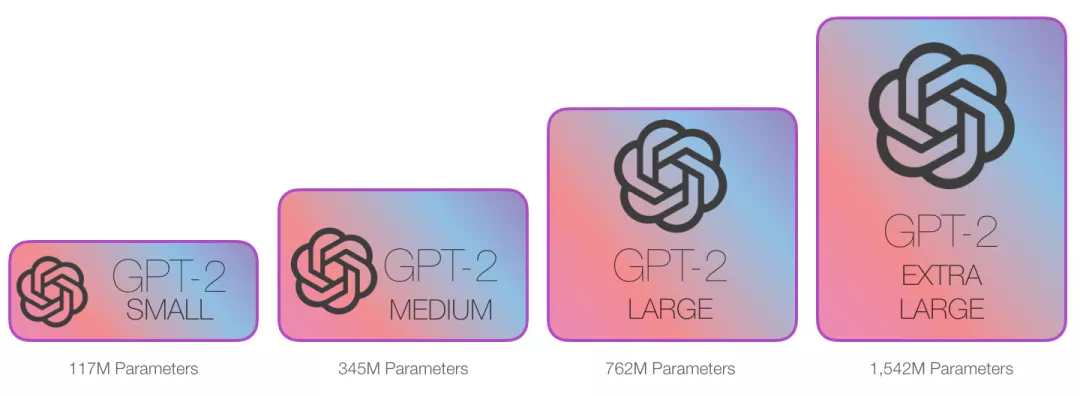

## 2.3 GPT Overview

GPT-2 是使用 Transformer 的 Decoder 模块构建的。另一方面，BERT 是使用 Transformer 的 Encoder 模块构建的。

GPT-2 和传统的语言模型一样，一次输出一个 token。例如，让一个训练好的 GPT-2 背诵机器人第一定律：

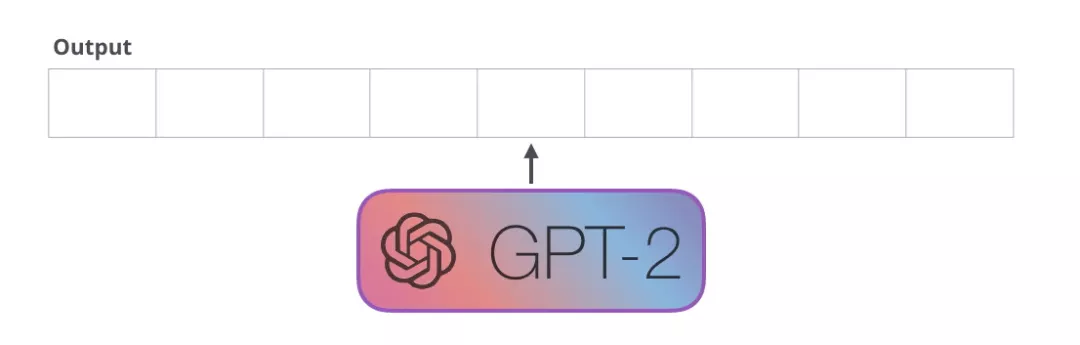

这些模型的实际工作方式是，在产生每个 token 之后，将这个 token 添加到输入的序列中，形成一个新序列。然后这个新序列成为模型在下一个时间步的输入。这是一种叫“自回归（auto-regression）”的思想。这种做法可以使得 RNN 非常有效。

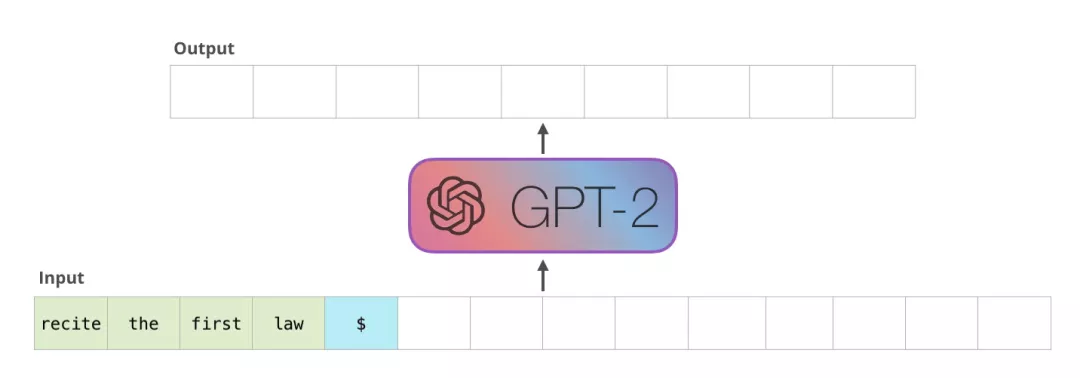

GPT-2，和后来的一些模型如 TransformerXL 和 XLNet，本质上都是自回归的模型。但 BERT 不是自回归模型。这是一种权衡。去掉了自回归后，BERT 能够整合左右两边的上下文，从而获得更好的结果。XLNet 重新使用了 自回归，同时也找到一种方法能够结合两边的上下文。

## 2.3.1 Transformer 模块的进化

**Encoder**

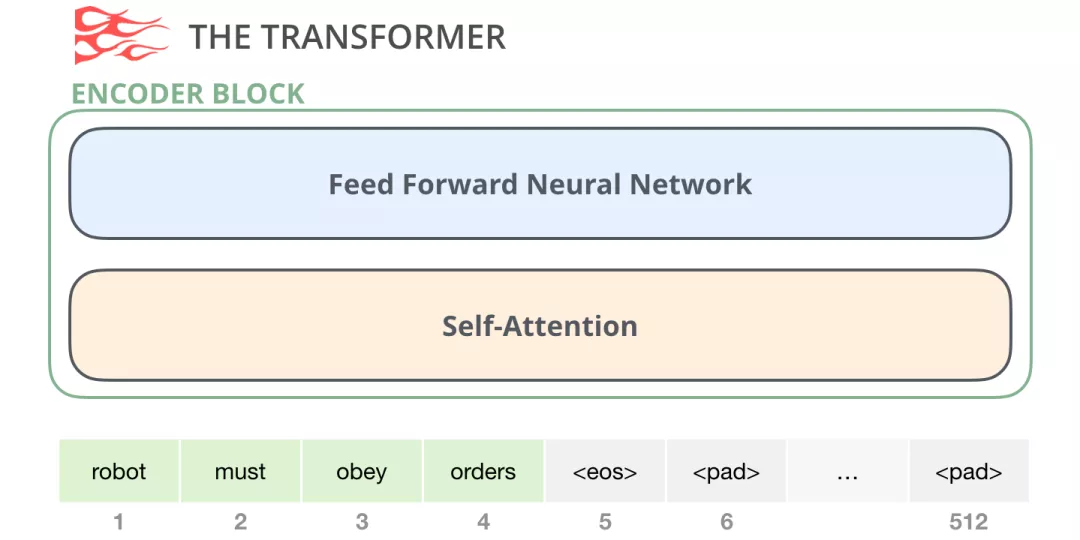

原始的 Transformer 论文中的 Encoder 模块接受特定长度的输入（如 512 个 token）。如果一个输入序列比这个限制短，我们可以填充序列的其余部分。

**Decoder**

其次是 Decoder。与 Encoder 相比，它在结构上有一个很小的差异：它有一个层，使得它可以关注来自 Encoder 特定的段。

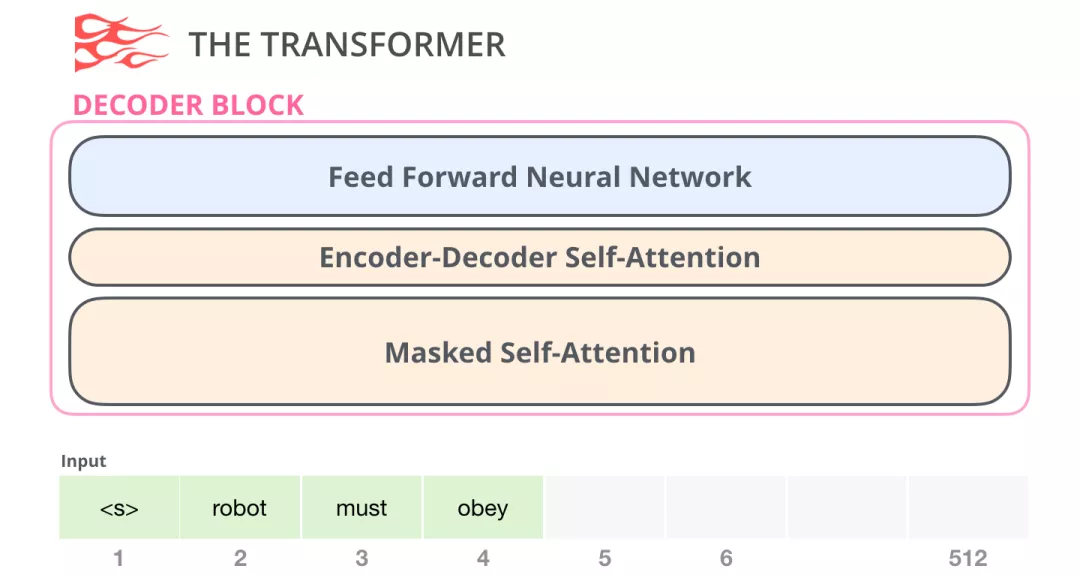

这里的 Self Attention 层的一个关注差异是，它会屏蔽未来的 token。具体来说，它不像 BERT 那样将单词改为mask，而是通过改变 Self Attention 的计算，阻止来自被计算位置右边的 token。

例如，我们想要计算位置 4，我们可以看到只允许处理以前和现在的 token。

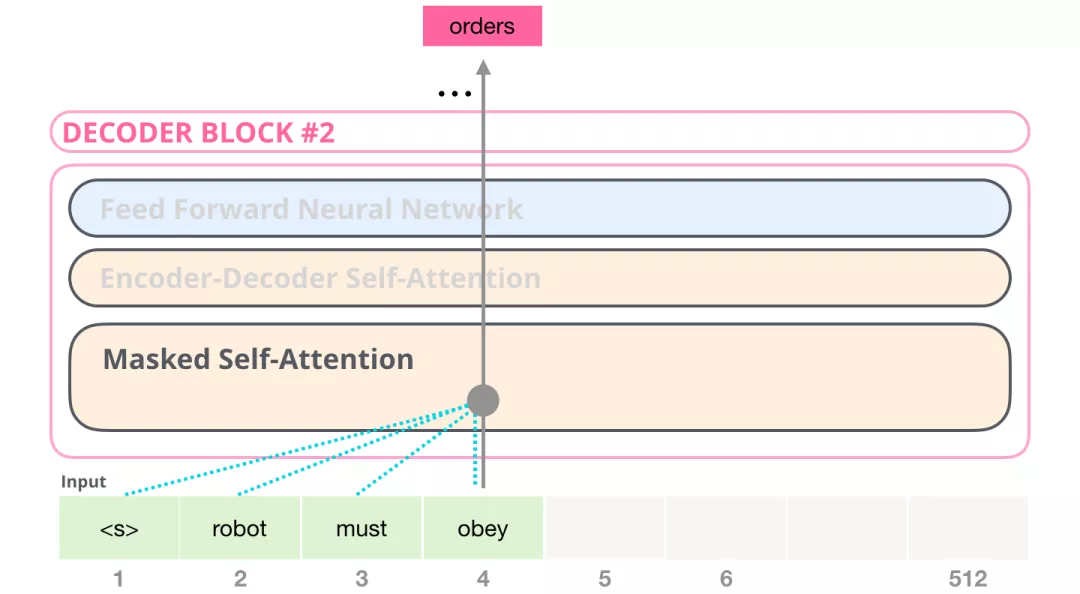

很重要的一点是，（BERT 使用的）Self Attention 和 （GPT-2 使用的）masked Self Attention 有明确的区别。一个正常的 Self Attention 模块允许一个位置关注到它右边的部分。而 masked Self Attention 阻止了这种情况的发生：

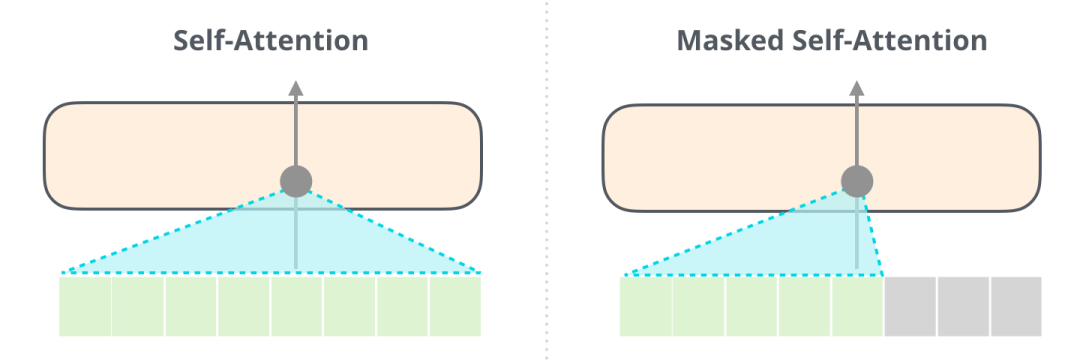

## 2.3.2 了解 GPT2

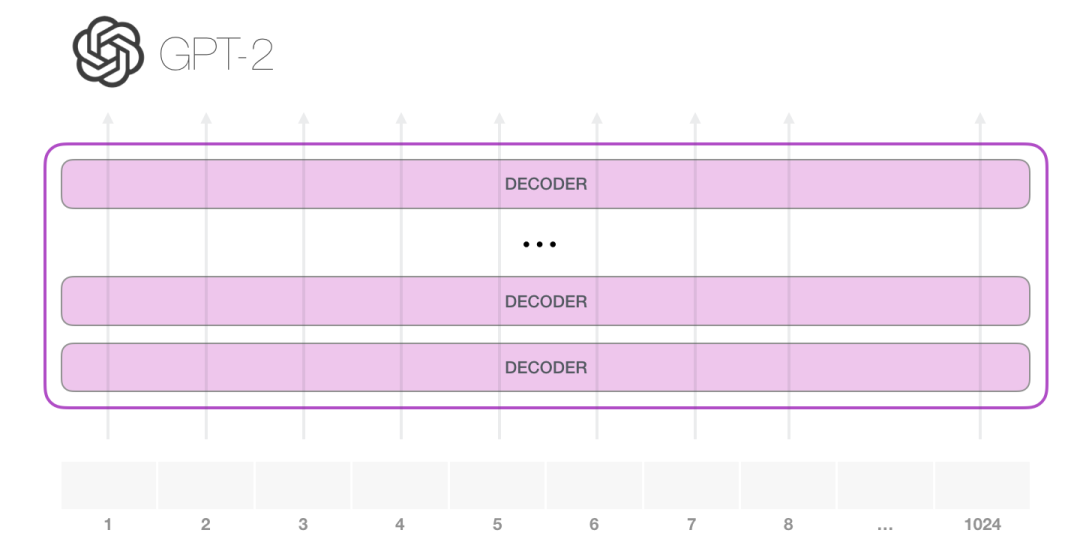

GPT-2 能够处理 1024 个 token。每个 token 沿着自己的路径经过所有的 Decoder 模块

运行一个训练好的 GPT-2 模型的最简单的方法是让它自己生成文本（这在技术上称为 生成无条件样本）。或者，我们可以给它一个提示，让它谈论某个主题（即生成交互式条件样本）。在漫无目的情况下，我们可以简单地给它输入初始 token，并让它开始生成单词（训练好的模型使用 <|endoftext|> 作为初始的 token。我们称之为 <s>）。

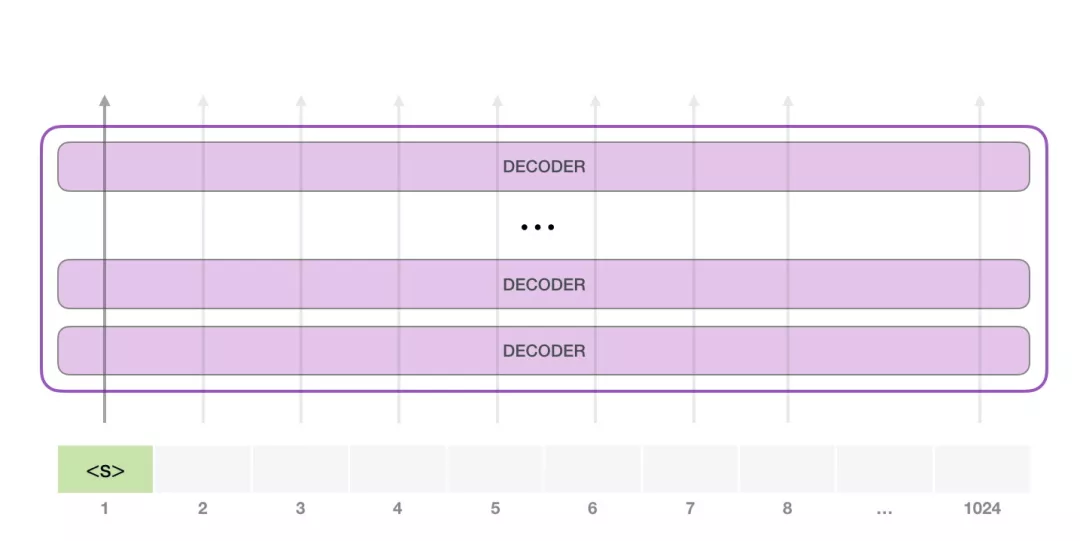

模型只有一个输入的 token，因此只有一条活跃路径。token 在所有层中依次被处理，然后沿着该路径生成一个向量。这个向量可以根据模型的词汇表计算出一个分数（模型知道所有的 单词，在 GPT-2 中是 5000 个词）。在这个例子中，我们选择了概率最高的 the。但我们可以把事情搞混--你知道如果一直在键盘 app 中选择建议的单词，它有时候会陷入重复的循环中，唯一的出路就是点击第二个或者第三个建议的单词。同样的事情也会发生在这里，GPT-2 有一个 top-k 参数，我们可以使用这个参数，让模型考虑第一个词（top-k =1）之外的其他词。

下一步，我们把第一步的输出添加到我们的输入序列，然后让模型做下一个预测。

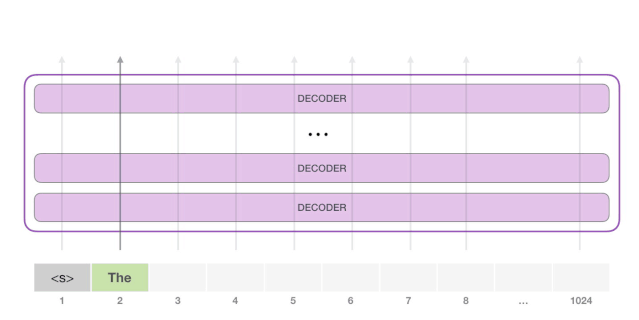

第二条路径是此计算中唯一活动的路径。GPT-2 的每一层都保留了它自己对第一个 token 的解释，而且会在处理第二个 token 时使用它（我们会在接下来关于 Self Attention 的章节中对此进行更详细的介绍）。GPT-2 不会根据第二个 token 重新计算第一个 token。

## 2.3.3 更多细节

让我们更深入地了解模型。首先从输入开始。与之前我们讨论的其他 NLP 模型一样，GPT-2 在嵌入矩阵中查找输入的单词的对应的 embedding 向量--这是我们从训练好的模型中得到的组件之一。

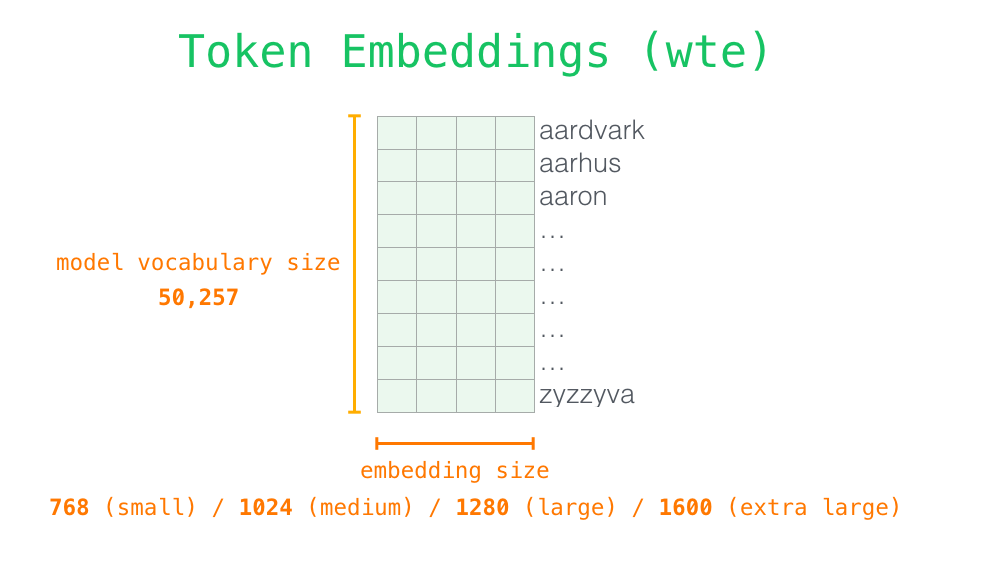

每一行都是词的 embedding：这是一个数字列表，可以表示一个词并捕获一些含义。这个列表的大小在不同的 GPT-2 模型中是不同的。最小的模型使用的 embedding 大小是 768

因此在开始时，我们会在嵌入矩阵查找第一个 token s 的 embedding。在把这个 embedding 传给模型的第一个模块之前，我们需要融入位置编码，这个位置编码能够指示单词在序列中的顺序。训练好的模型中，有一部分是一个矩阵，这个矩阵包括了 1024 个位置中每个位置的位置编码向量。